In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
print(tf.__version__)

2.5.0


In [3]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-07-02 14:15:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  10.7MB/s    in 37s     

2021-07-02 14:15:43 (8.30 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/rockpaperscissors'

In [5]:
import shutil
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images', ignore_errors=True)
!rm /tmp/rockpaperscissors/README_rpc-cv-images.txt

In [81]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    zoom_range=0.2,
                    rotation_range=180,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

In [82]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    shuffle=True,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [84]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [85]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3)

In [86]:
epochs = 20
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=epochs,
      validation_data=val_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callback])

Epoch 1/20
25/25 - 6s - loss: 1.1046 - accuracy: 0.3468 - val_loss: 1.0817 - val_accuracy: 0.4625
Epoch 2/20
25/25 - 6s - loss: 1.0296 - accuracy: 0.4494 - val_loss: 0.9903 - val_accuracy: 0.4812
Epoch 3/20
25/25 - 6s - loss: 0.9668 - accuracy: 0.4922 - val_loss: 0.9387 - val_accuracy: 0.4938
Epoch 4/20
25/25 - 6s - loss: 0.8837 - accuracy: 0.5455 - val_loss: 0.8615 - val_accuracy: 0.6375
Epoch 5/20
25/25 - 6s - loss: 0.6948 - accuracy: 0.7117 - val_loss: 0.5416 - val_accuracy: 0.7875
Epoch 6/20
25/25 - 6s - loss: 0.5117 - accuracy: 0.8125 - val_loss: 0.5433 - val_accuracy: 0.8375
Epoch 7/20
25/25 - 6s - loss: 0.4358 - accuracy: 0.8377 - val_loss: 0.3144 - val_accuracy: 0.9062
Epoch 8/20
25/25 - 6s - loss: 0.2709 - accuracy: 0.9150 - val_loss: 0.3586 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 6s - loss: 0.2881 - accuracy: 0.9052 - val_loss: 0.2669 - val_accuracy: 0.9062
Epoch 10/20
25/25 - 6s - loss: 0.3210 - accuracy: 0.8844 - val_loss: 0.3634 - val_accuracy: 0.9250
Epoch 11/20
25/25 -

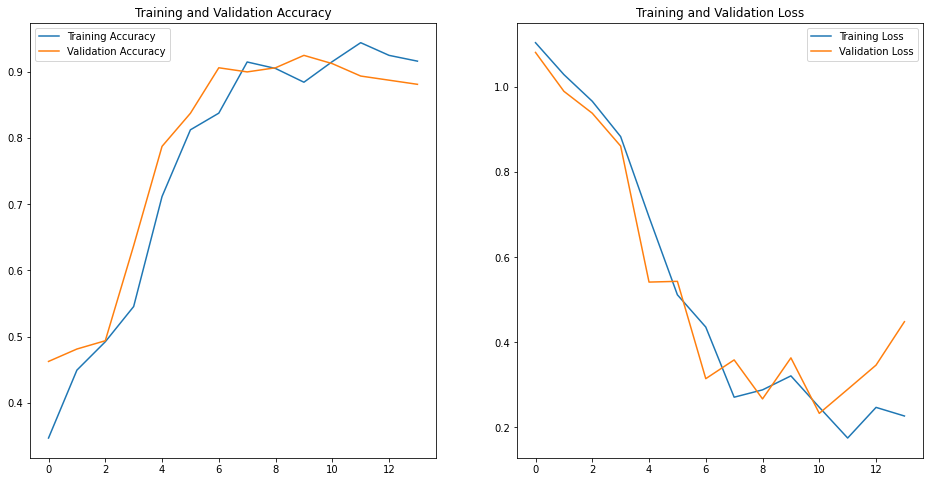

In [94]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

range = range(14)

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.plot(range, acc, label='Training Accuracy')
plt.plot(range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range, loss, label='Training Loss')
plt.plot(range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

del range
plt.show()

In [91]:
del range

Saving paper.PNG to paper (2).PNG
paper


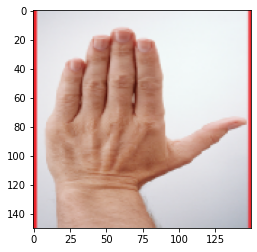

In [100]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, 0)

  images = np.vstack([x])
  classes = model.predict(x, batch_size=10)
  output_class = np.argmax(classes)
  
  if output_class==0:
    print('paper')
  elif output_class==1:
    print('rock')
  else:
    print('scissors')

In [99]:
classes

array([[0., 1., 0.]], dtype=float32)